# Identifying common team moves in football using statistical analysis

## Question or problem definition

We are given positional data of all 22 players and the ball on the football pitch. We intend to find out how the team adjusts itself to different contexts inside the game and use statistical analysis to identify such team moves in football

## Acquire training and testing data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
%matplotlib inline

data = pd.read_pickle('football/test_data_1.pkl')

## Wrangle, prepare and cleanse the data

The data contains multiple columns of sequences ('sequence_1' to 'sequence_18') of play from actual football games in which each players and the balls positions are recorded

Let us define the columns in the data based on available information: first 22 columns are X,Y positions of defensive players, second 22 columns are X,Y columns of offensive players, last 2 columns are X,Y position of the ball in play

In [2]:
columns = ['GKDef_X', 'GKDef_Y', 'Def1_X', 'Def1_Y','Def2_X', 'Def2_Y','Def3_X', 'Def3_Y','Def4_X', 'Def4_Y','Def5_X', 'Def5_Y', 'Def6_X', 'Def6_Y', 'Def7_X', 'Def7_Y','Def8_X', 'Def8_Y','Def9_X', 'Def9_Y','Def10_X', 'Def10_Y', 'GKAtt_X','GKAtt_Y','Att1_X','Att1_Y','Att2_X','Att2_Y','Att3_X','Att3_Y','Att4_X','Att4_Y','Att5_X','Att5_Y','Att6_X','Att6_Y','Att7_X','Att7_Y','Att8_X','Att8_Y','Att9_X','Att9_Y','Att10_X','Att10_Y','Ball_X','Ball_Y']

### Displaying a sequence of play and showing movement of the ball

Let us the use the columns we designed above to convert the data into a DataFrame and display the trajectory of the ball for a test sequence

In [3]:
test_sequence = 'sequence_1'
df = pd.DataFrame(data[test_sequence], columns = columns)
df.head(5)

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_X,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y
0,43.018059,1.379710,-13.374524,24.342030,15.370722,23.849276,8.483840,-10.150724,8.284221,15.078260,...,11.278517,8.08116,-5.489544,14.486957,4.890684,26.411594,0.499049,19.907248,-19.961977,3.843478
1,42.918251,1.379710,-13.274715,24.144928,15.071293,23.652174,8.284221,-10.150724,8.284221,14.881160,...,10.979088,8.08116,-5.589354,14.191304,4.990494,26.411594,0.399240,19.808697,-20.680607,3.863188
2,42.818443,1.379710,-13.274715,23.849276,14.672052,23.455074,7.984791,-10.249275,8.184410,14.486957,...,10.779468,8.08116,-5.788973,13.895652,5.090304,26.411594,0.399240,19.710144,-21.409222,3.892754
3,42.718632,1.379710,-13.274715,23.553623,14.272815,23.257971,7.785172,-10.249275,8.084601,14.191304,...,10.579848,8.08116,-5.988593,13.600000,5.190114,26.411594,0.299430,19.611595,-22.137833,3.922319
4,42.618820,1.281159,-13.174905,23.356522,13.973383,23.060869,7.585552,-10.249275,7.984791,13.895652,...,10.380228,8.08116,-6.088403,13.304348,5.289924,26.510145,0.199620,19.513042,-22.866446,3.951884


In [4]:
# Obtaining the positions occupied by the ball
ball_pos = df[['Ball_X','Ball_Y']].values.tolist()
ball_pos[0]

[-19.961977005004883, 3.843478202819824]

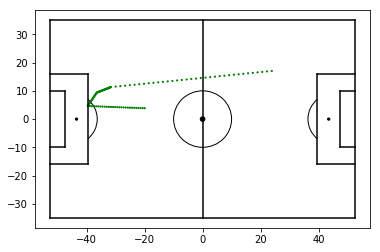

In [5]:
# Plotting the ball along with the position of the ball
# Run with createPitch([]) to just display the pitch
def createPitch(ball_pos, defense_pos, attack_pos):
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([-52.5,-52.5],[-35,35], color="black")
    plt.plot([-52.5,52.5],[35,35], color="black")
    plt.plot([52.5,52.5],[35,-35], color="black")
    plt.plot([52.5,-52.5],[-35,-35], color="black")
    plt.plot([0,0],[-35,35], color="black")
    
    #Left Penalty Area
    plt.plot([-39.5,-39.5],[16,-16],color="black")
    plt.plot([-52.5,-39.5],[16,16],color="black")
    plt.plot([-39.5,-52.5],[-16,-16],color="black")
    
    #Right Penalty Area
    plt.plot([39.5,39.5],[16,-16],color="black")
    plt.plot([52.5,39.5],[16,16],color="black")
    plt.plot([39.5,52.5],[-16,-16],color="black")
    
    #Left 6-yard Box
    plt.plot([-52.5,-47.5],[-10,-10],color="black")
    plt.plot([-47.5,-47.5],[-10,10],color="black")
    plt.plot([-52.5,-47.5],[10,10],color="black")
    
    #Right 6-yard Box
    plt.plot([52.5,47.5],[-10,-10],color="black")
    plt.plot([47.5,47.5],[-10,10],color="black")
    plt.plot([52.5,47.5],[10,10],color="black")
    
    #Create Arc and add it to our plot
    leftArc = patches.Arc((-45.5,0),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((45.5,0),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    
    #Assign circles to variables - do not fill the centre circle!
    centreCircle = plt.Circle((0,0),10,color="black",fill=False)
    centreSpot = plt.Circle((0,0),0.8,color="black")
    leftPenSpot = plt.Circle((-43.5,0),0.4, color="black")
    rightPenSpot = plt.Circle((43.5,0),0.4, color="black")
    
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Draw the circles to our plot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Plotting the ball
    for pos in attack_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="red")
        ax.add_patch(locBall)
    for pos in defense_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="blue")
        ax.add_patch(locBall)
    for pos in ball_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="green")
        ax.add_patch(locBall)
    
        
createPitch(ball_pos, [], [])

### Creating a dataframe with all the values in the dataset

Here we can create the dataframe with all the sequences available to us in order to build the DataFrame for our analysis

In [6]:
positions = []
new_cols = columns #+ ['Seq']
for seq in data:
    for d_seq in data[seq]:
        seq_list = d_seq.tolist()
        #seq_list.append(seq)
        positions.append(seq_list)
df_data = pd.DataFrame(positions, columns = new_cols)
df_data

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_X,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y
0,43.306217,2.921482,14.167463,3.022222,12.961722,21.457777,5.124402,-14.204445,3.717703,27.401482,...,9.545455,21.860743,-23.009569,-9.167407,10.550240,5.943704,-1.306220,33.647408,-13.665071,21.558519
1,43.306217,2.820741,14.167463,3.022222,13.062201,21.457777,5.124402,-14.204445,3.717703,27.401482,...,9.545455,21.860743,-23.009569,-9.368889,10.550240,5.943704,-1.306220,33.647408,-14.117226,19.956739
2,43.306217,2.720000,14.167463,2.921482,13.062201,21.457777,5.124402,-14.305185,3.717703,27.300741,...,9.645933,21.860743,-23.009569,-9.469630,10.650718,5.842963,-1.205742,33.647408,-14.569378,18.354963
3,43.205742,2.619259,14.167463,2.820741,13.162680,21.457777,5.224881,-14.405926,3.717703,27.300741,...,9.645933,21.860743,-23.009569,-9.570370,10.751196,5.842963,-1.105263,33.647408,-15.021531,16.763260
4,43.205742,2.619259,14.167463,2.720000,13.263158,21.457777,5.224881,-14.506667,3.717703,27.300741,...,9.645933,21.860743,-23.009569,-9.671111,10.751196,5.742222,-1.004785,33.647408,-15.473683,15.161481
5,43.205742,2.518518,14.167463,2.619259,13.263158,21.457777,5.224881,-14.607408,3.717703,27.200001,...,9.746411,21.760000,-23.009569,-9.771852,10.751196,5.641481,-0.904306,33.546669,-15.935885,13.569778
6,43.205742,2.417778,14.167463,2.518518,13.363636,21.457777,5.224881,-14.708148,3.717703,27.200001,...,9.746411,21.760000,-23.009569,-9.872593,10.851675,5.540740,-0.904306,33.546669,-16.388039,11.968000
7,43.205742,2.317037,14.167463,2.317037,13.464114,21.457777,5.124402,-14.708148,3.717703,27.099260,...,9.846890,21.659260,-23.009569,-9.872593,10.851675,5.440000,-0.803828,33.546669,-16.840191,10.376297
8,43.205742,2.216296,14.066985,2.216296,13.464114,21.457777,5.124402,-14.808888,3.717703,26.998518,...,9.846890,21.659260,-23.009569,-9.973333,10.851675,5.339259,-0.803828,33.546669,-17.292343,8.774519
9,43.105263,2.115556,14.066985,2.014815,13.564593,21.357037,5.124402,-14.909630,3.717703,26.897778,...,9.947369,21.659260,-23.009569,-10.174814,10.851675,5.238519,-0.803828,33.445927,-17.754545,7.172741


Trying to crunch the data into positions of players

In [7]:
def parse_data(df):
    defense = []
    attack = []
    ball = []
    defense.append(df[['GKDef_X','GKDef_Y']].values.tolist())
    defense.append(df[['Def1_X','Def1_Y']].values.tolist())
    defense.append(df[['Def2_X','Def2_Y']].values.tolist())
    defense.append(df[['Def3_X','Def3_Y']].values.tolist())
    defense.append(df[['Def4_X','Def4_Y']].values.tolist())
    defense.append(df[['Def5_X','Def5_Y']].values.tolist())
    defense.append(df[['Def6_X','Def6_Y']].values.tolist())
    defense.append(df[['Def7_X','Def7_Y']].values.tolist())
    defense.append(df[['Def8_X','Def8_Y']].values.tolist())
    defense.append(df[['Def9_X','Def9_Y']].values.tolist())
    defense.append(df[['Def10_X','Def10_Y']].values.tolist())
    attack.append(df[['GKAtt_X','GKAtt_Y']].values.tolist())
    attack.append(df[['Att1_X','Att1_Y']].values.tolist())
    attack.append(df[['Att2_X','Att2_Y']].values.tolist())
    attack.append(df[['Att3_X','Att3_Y']].values.tolist())
    attack.append(df[['Att4_X','Att4_Y']].values.tolist())
    attack.append(df[['Att5_X','Att5_Y']].values.tolist())
    attack.append(df[['Att6_X','Att6_Y']].values.tolist())
    attack.append(df[['Att7_X','Att7_Y']].values.tolist())
    attack.append(df[['Att8_X','Att8_Y']].values.tolist())
    attack.append(df[['Att9_X','Att9_Y']].values.tolist())
    attack.append(df[['Att10_X','Att10_Y']].values.tolist())
    ball = df[['Ball_X','Ball_Y']].values.tolist()
    return defense, attack, ball

list_defense, list_attack, list_ball = parse_data(df)

In [8]:
len(list_defense), len(list_attack), len(list_ball)

(11, 11, 127)

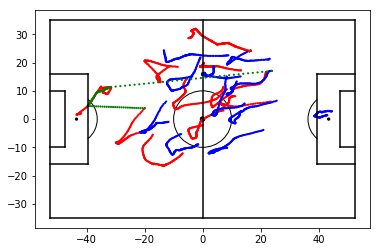

In [18]:
def_list = []
att_list = []
for i in range (0,11):
    def_list = def_list + list_defense[i]
    att_list = att_list + list_attack[i]

createPitch(list_ball, def_list, att_list)